Chapter 25  
# Truncated SVD
*Machine Learning Made Easy and Visual with Python*

##  Initialization 

In [3]:
import matplotlib.pyplot as plt          # For plotting and visualization
import numpy as np                       # For numerical computations
from skimage import color                # For converting RGB image to grayscale
from skimage import io                   # For image I/O (reading files)

##  Load the Image 

In [5]:
# Read image and convert to grayscale
X = color.rgb2gray(io.imread('iris_photo.jpg'))

# Optional: downsample the image for faster computation
# DOWNSAMPLE = 5
# X = X[::DOWNSAMPLE, ::DOWNSAMPLE]

In [6]:
# Check basic statistics of the image matrix
X.min()     # Minimum pixel value

0.0

In [7]:
X.max()     # Maximum pixel value

1.0

In [8]:
X.shape     # Shape of the image (rows x columns)

(2990, 2714)

In [9]:
np.linalg.matrix_rank(X)  # Compute the rank of the data matrix

2714

##  Run Singular Value Decomposition (SVD) 

In [11]:
# Decompose X into U, S, V such that X = U @ diag(S) @ V
U, S, V = np.linalg.svd(X)

In [12]:
n_components = len(S)             # Total number of singular values
component_idx = range(1, n_components + 1)

In [13]:
# Compute eigenvalues (variance explained by each component)
# Note: For uncentered data, this is an approximation
lambda_i = np.square(S) / (X.shape[0] - 1)

##  Visualize Original Image 

Text(0.5, 1.0, 'Original Grayscale Image')

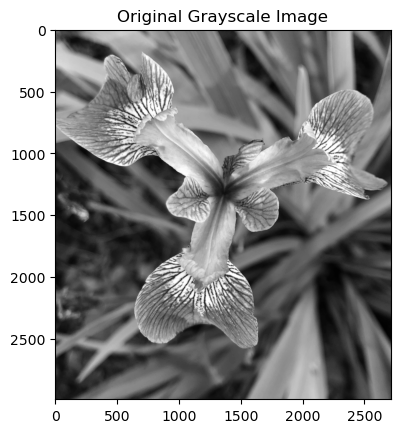

In [15]:
fig, axs = plt.subplots()
plt.imshow(X, cmap='gray')
plt.title("Original Grayscale Image")

##  Singular Values 

Text(0.5, 1.0, 'Singular Values of Image Matrix')

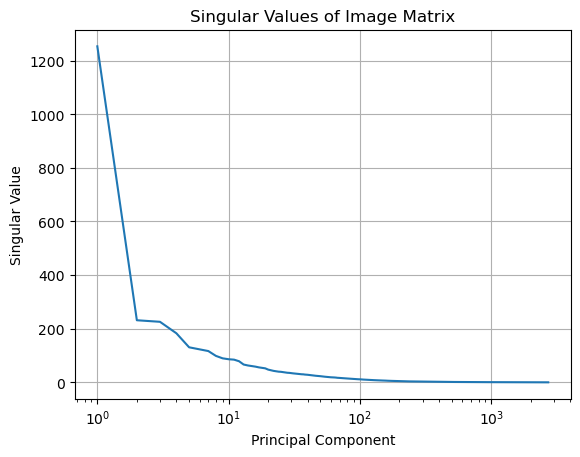

In [17]:
fig, ax = plt.subplots()
# Plot raw singular values
plt.plot(component_idx, S)
plt.grid()
ax.set_xscale('log')  # Use logarithmic scale for clarity
ax.set_xlabel("Principal Component")
ax.set_ylabel("Singular Value")
ax.set_title("Singular Values of Image Matrix")

##  Eigenvalues 

Text(0.5, 1.0, 'Eigenvalues (Variance per Component)')

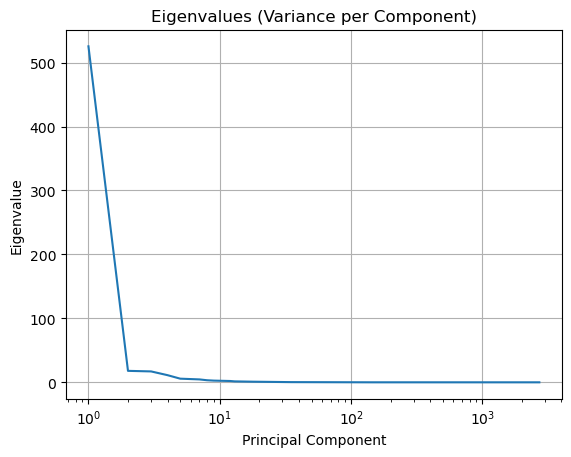

In [19]:
fig, ax = plt.subplots()
plt.plot(component_idx, lambda_i)
plt.grid()
ax.set_xscale('log')
ax.set_xlabel("Principal Component")
ax.set_ylabel("Eigenvalue")
ax.set_title("Eigenvalues (Variance per Component)")

##  Cumulative Variance Explained 

Text(0.5, 1.0, 'Cumulative Variance Explained by Components')

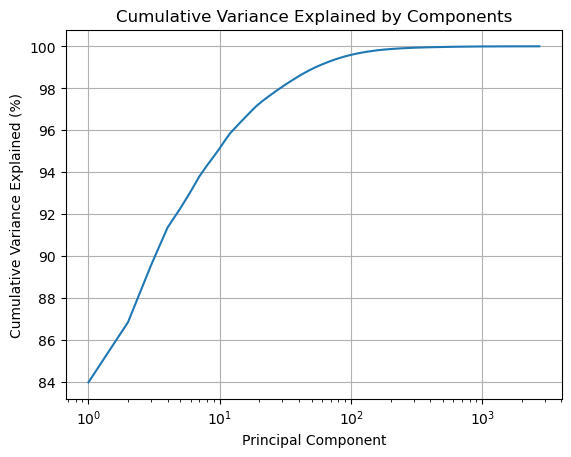

In [21]:
variance_explained = 100 * np.cumsum(lambda_i) / lambda_i.sum()

fig, ax = plt.subplots()
plt.plot(component_idx, variance_explained)
plt.grid()
ax.set_xscale('log')
ax.set_xlabel("Principal Component")
ax.set_ylabel("Cumulative Variance Explained (%)")
ax.set_title("Cumulative Variance Explained by Components")

##  Image Reconstruction with Different Ranks 

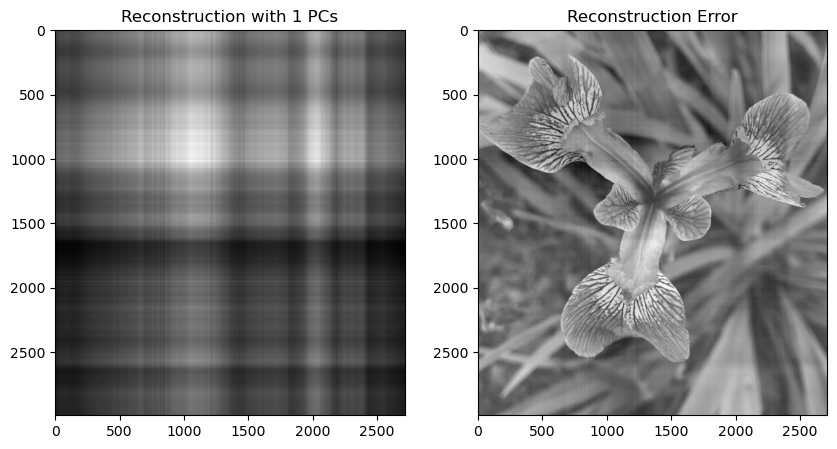

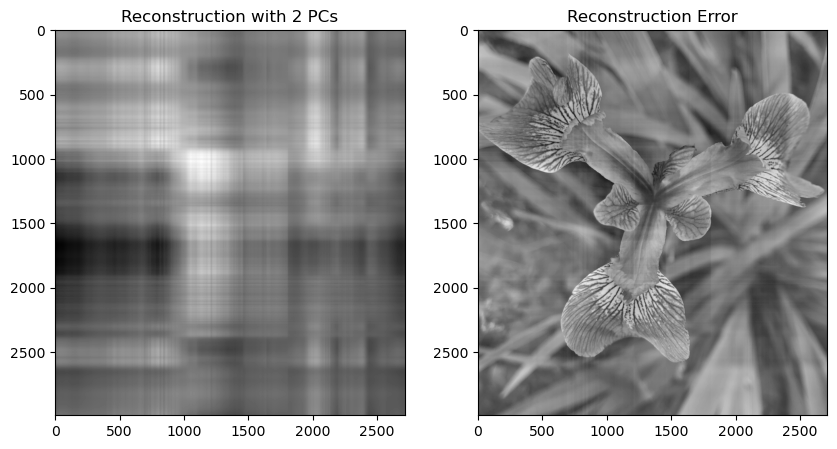

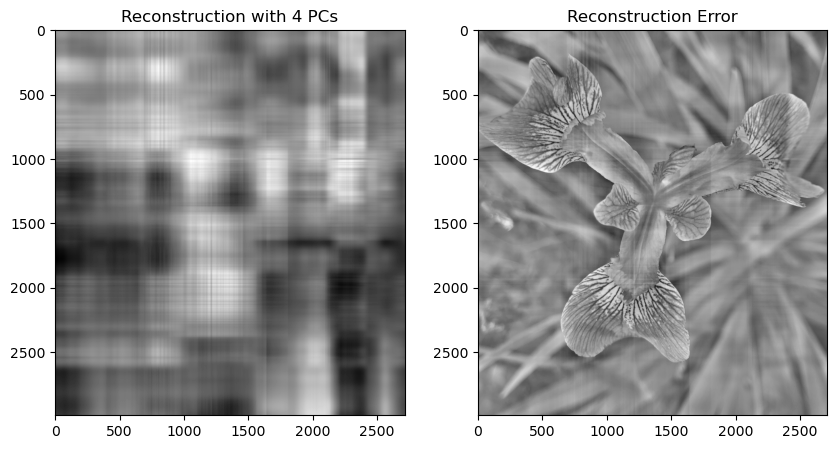

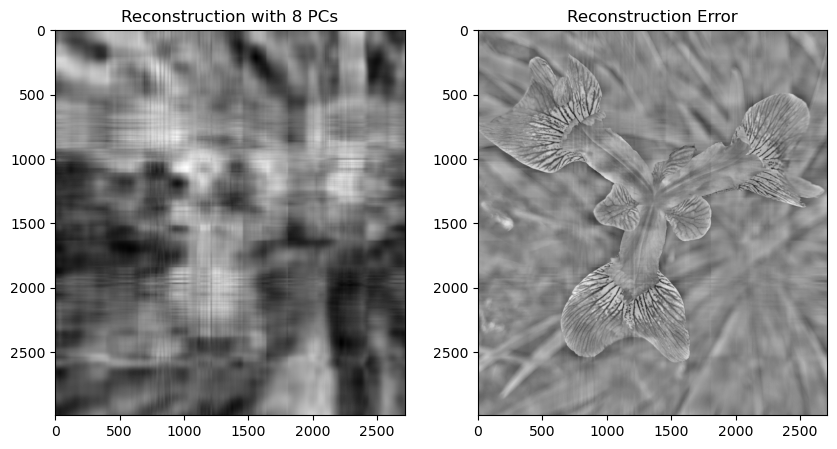

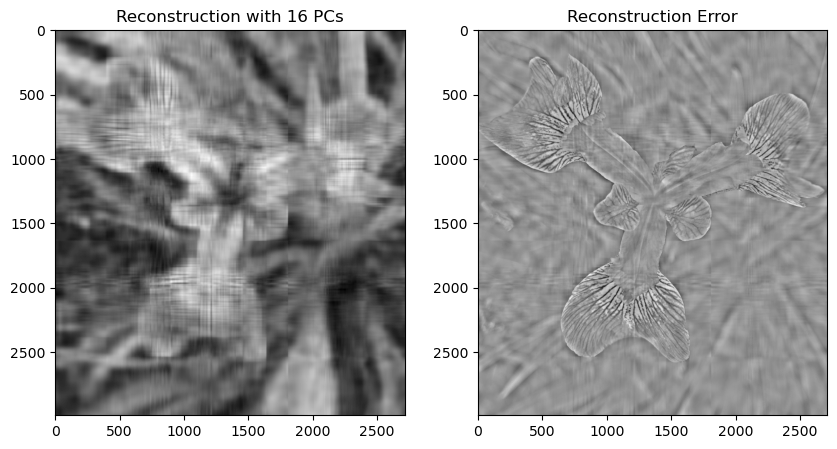

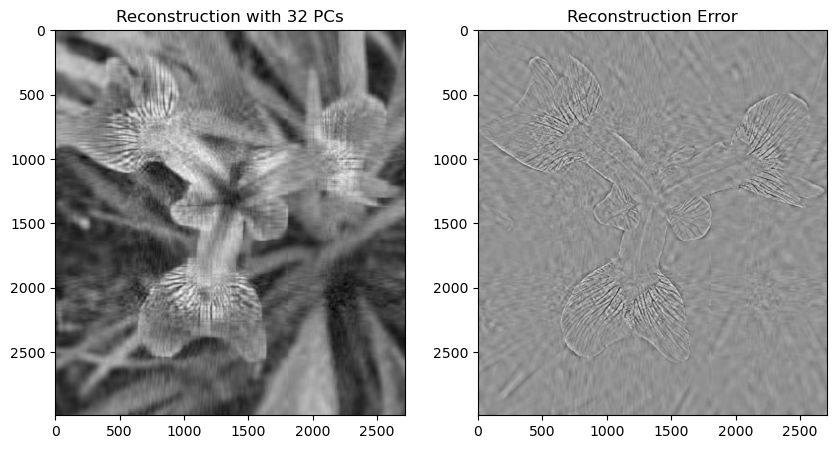

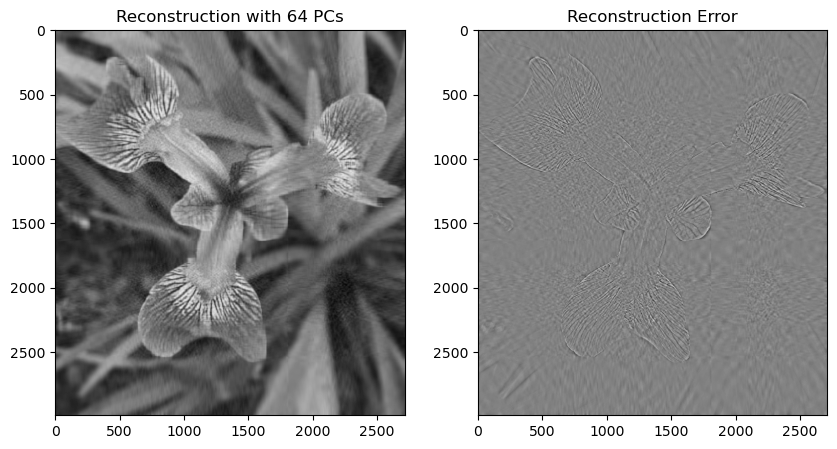

In [23]:
# Reconstruct image using increasing number of singular vectors/values
for rank in [1, 2, 4, 8, 16, 32, 64]:
    # Reconstruct the image using top 'rank' components
    X_reconstruction = U[:, :rank] * S[:rank] @ V[:rank, :]
    
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    
    # Display reconstructed image
    axs[0].imshow(X_reconstruction, cmap='gray')
    axs[0].set_title('Reconstruction with ' + str(rank) + ' PCs')
    
    # Display reconstruction error
    axs[1].imshow(X - X_reconstruction, cmap='gray')
    axs[1].set_title('Reconstruction Error')

##  Rank-1 Matrices 

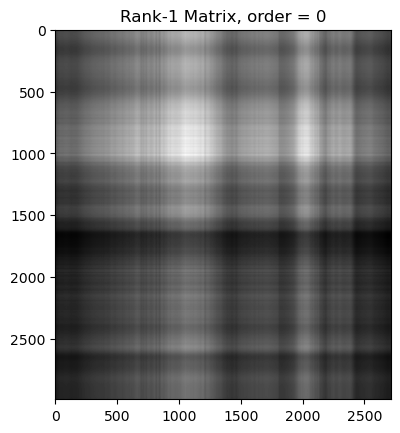

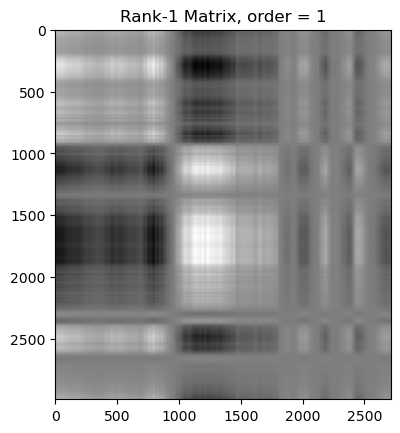

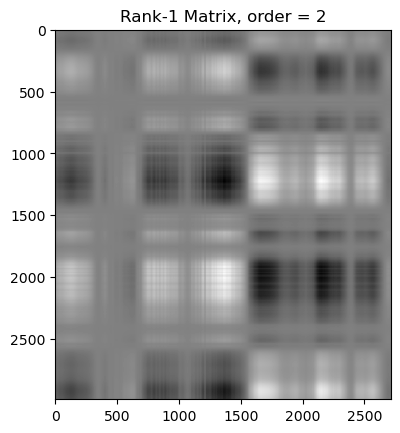

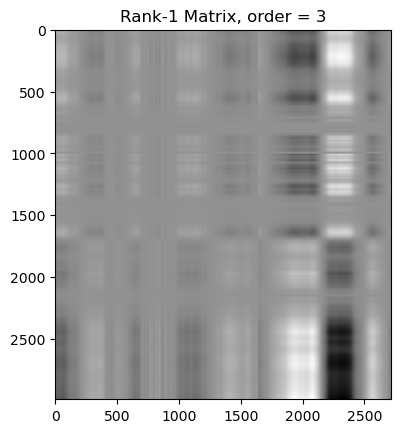

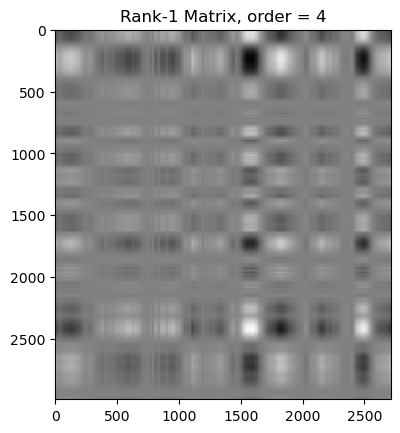

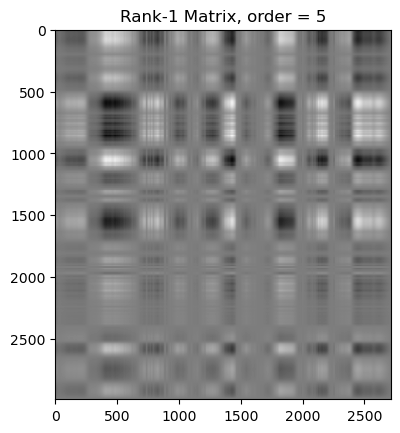

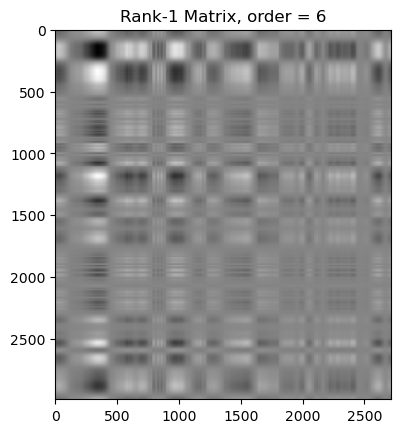

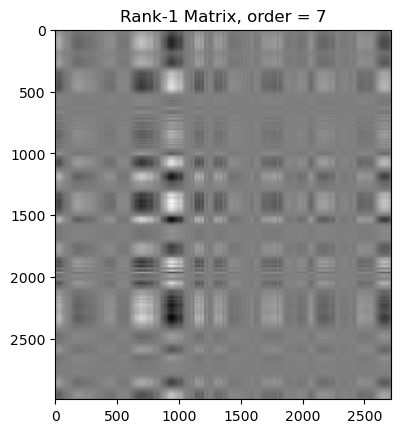

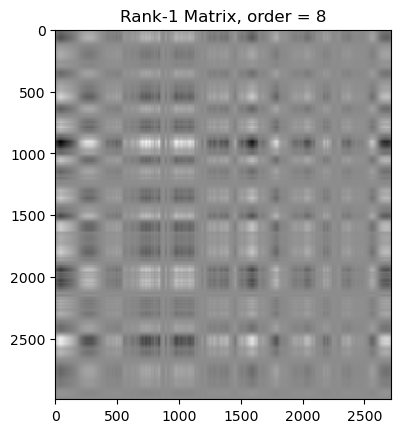

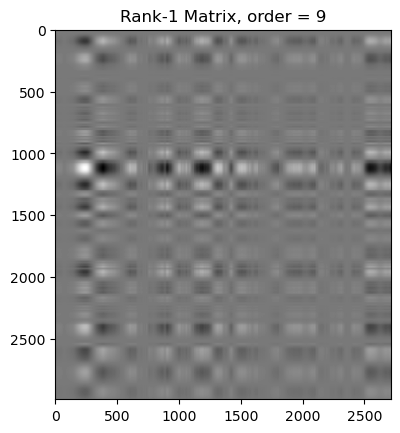

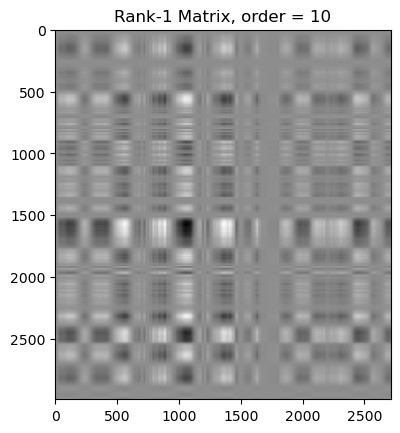

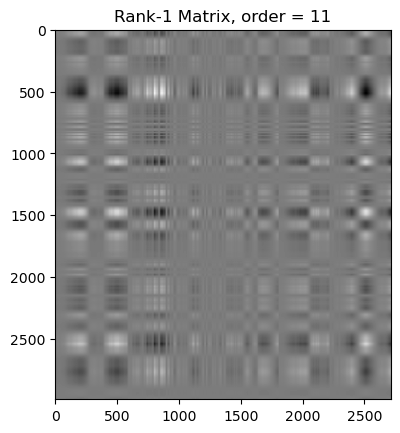

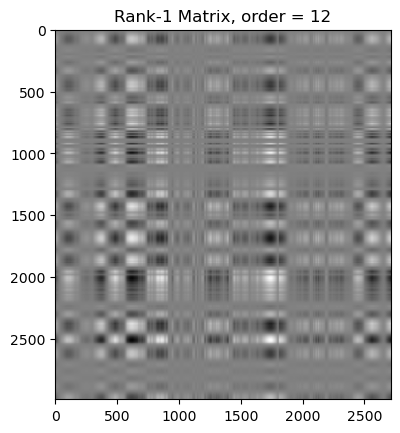

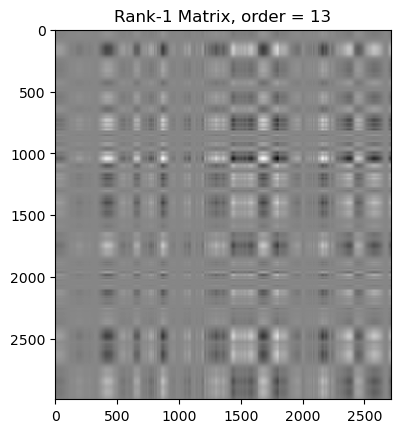

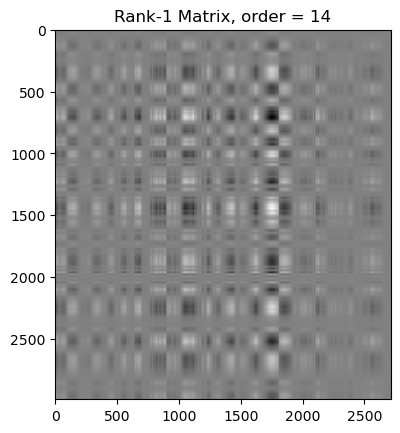

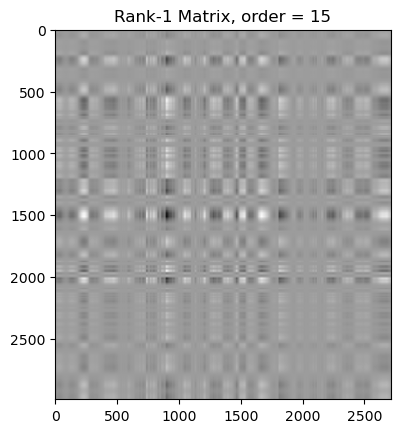

In [25]:
# Visualize individual rank-1 contributions
for order in np.arange(0, 16):
    X_rank_1 = S[order] * U[:, [order]] @ V[[order], :]
    
    fig, ax = plt.subplots()
    ax.imshow(X_rank_1, cmap='gray')
    ax.set_title('Rank-1 Matrix, order = ' + str(order))

##  Truncated SVD using Scikit-Learn 

In [27]:
from sklearn.decomposition import TruncatedSVD

# Initialize truncated SVD with top 16 components
svd = TruncatedSVD(n_components=16)

##  Reduce dimensionality 

In [29]:
X_reduced = svd.fit_transform(X)  # Shape: (n_samples, n_components)
print("Reduced data shape:", X_reduced.shape)
# Example output: (2990, 16)

Reduced data shape: (2990, 16)


##  Reconstruct approximate data 

In [31]:
X_approx = svd.inverse_transform(X_reduced)
print("Approximate image shape:", X_approx.shape)
# Example output: (2990, 2714)

Approximate image shape: (2990, 2714)


In [32]:
# Rank of the approximated matrix should match n_components
print("Matrix rank after Truncated SVD:", np.linalg.matrix_rank(X_approx))
# Output: 16

Matrix rank after Truncated SVD: 16


##  Visualize Reconstructed Image 

Text(0.5, 1.0, 'Approximate Image from Truncated SVD')

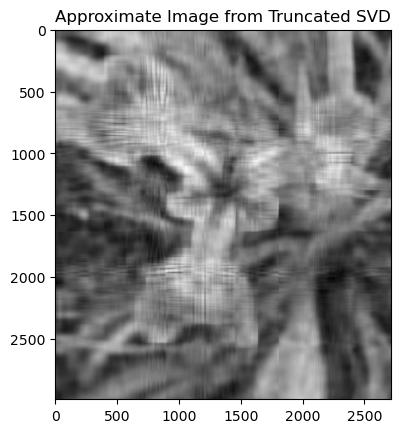

In [34]:
fig, axs = plt.subplots()
plt.imshow(X_approx, cmap='gray')
plt.title("Approximate Image from Truncated SVD")